In [1]:
import os
import glob

file_pattern = "/kaggle/working/*"
files_to_remove = glob.glob(file_pattern)

print(f"Found {len(files_to_remove)} items to remove.")

# Loop through the list and remove each file
for file_path in files_to_remove:
    if os.path.isfile(file_path):
        try:
            os.remove(file_path)
            print(f"Removed file: {file_path}")
        except Exception as e:
            print(f"Error removing {file_path}: {e}")
    else:
        print(f"Skipped directory: {file_path}")

Found 0 items to remove.


# 1. Dataset Acquisition and Annotation

In [2]:
# read the dataset and view it
import pandas as pd
df = pd.read_csv("/kaggle/input/recipe-ingredient-dataset/train.csv")

### Explore the dataset

In [3]:
df

,source,ingredient_id,token_id,token,label
0,ar,0,0,4,QUANTITY
1,ar,0,1,cloves,UNIT
2,ar,0,2,garlic,NAME
3,ar,1,0,2,QUANTITY
4,ar,1,1,tablespoons,UNIT
...,...,...,...,...,...
37235,gk,5141,21,the,O
37236,gk,5141,22,larger,O
37237,gk,5141,23,amount,O
37238,gk,5141,24,o,O


In [4]:
# describe numerical columns
df.describe()

,ingredient_id,token_id
count,37240.000000,37240.000000
mean,2333.621590,3.121026
std,1555.538286,3.194197
min,0.000000,0.000000
25%,938.000000,1.000000
50%,2155.000000,2.000000
75%,3747.000000,4.000000
max,5141.000000,28.000000


In [5]:
# view different types of data in categorical columns
print("source:\n", ", ".join(df["source"].unique()))

source:
 ar, gk


In [6]:
print("labels:\n", ", ".join(df["label"].unique()))

labels:
 QUANTITY, UNIT, NAME, O, STATE, DF, SIZE, TEMP


In [7]:
df[df["label"] == "O"]

,source,ingredient_id,token_id,token,label
7,ar,1,4,",",O
17,ar,3,4,",",O
18,ar,3,5,1/4-inch,O
19,ar,3,6,slices,O
20,ar,3,7,pulled,O
...,...,...,...,...,...
37235,gk,5141,21,the,O
37236,gk,5141,22,larger,O
37237,gk,5141,23,amount,O
37238,gk,5141,24,o,O


In [8]:
df[df["label"] == "STATE"]

,source,ingredient_id,token_id,token,label
8,ar,1,5,divided,STATE
27,ar,4,4,seeded,STATE
29,ar,4,6,minced,STATE
43,ar,7,2,sliced,STATE
44,ar,7,3,pitted,STATE
...,...,...,...,...,...
37031,gk,5114,2,stewing,STATE
37034,gk,5114,5,cut,STATE
37047,gk,5116,5,cut,STATE
37115,gk,5125,4,sliced,STATE


In [9]:
df[df["label"] == "DF"]

,source,ingredient_id,token_id,token,label
11,ar,2,2,dried,DF
90,ar,14,3,fresh,DF
181,ar,29,2,fresh,DF
244,ar,39,4,fresh,DF
253,ar,41,2,fresh,DF
...,...,...,...,...,...
36779,gk,5076,1,fresh,DF
36816,gk,5080,2,fresh,DF
36841,gk,5083,2,fresh,DF
36864,gk,5085,5,fresh,DF


In [10]:
df[df["label"] == "TEMP"].head()

,source,ingredient_id,token_id,token,label
896,ar,172,2,hot,TEMP
1154,ar,219,6,frozen,TEMP
1548,ar,289,2,frozen,TEMP
1939,ar,364,2,warm,TEMP
2733,ar,505,2,warm,TEMP


In [11]:
df[df["ingredient_id"] == 0]

,source,ingredient_id,token_id,token,label
0,ar,0,0,4,QUANTITY
1,ar,0,1,cloves,UNIT
2,ar,0,2,garlic,NAME
8212,gk,0,0,2,QUANTITY
8213,gk,0,1,cups,UNIT
8214,gk,0,2,cooked,STATE
8215,gk,0,3,corned,STATE
8216,gk,0,4,beef,NAME
8217,gk,0,5,-LRB-,O
8218,gk,0,6,or,O


- `source`: Which dataset/website this recipe came from
- `ingredient_id`: Groups tokens into one ingredient line
- `token_id`: Keeps the order of words inside that line
- `token`: The actual text token
- `label`: The NER label for that token


In [12]:
df = pd.read_csv("/kaggle/input/recipe-ingredient-dataset/train.csv")

In [13]:
df = pd.DataFrame(df["token"][df['label'] == "O"])

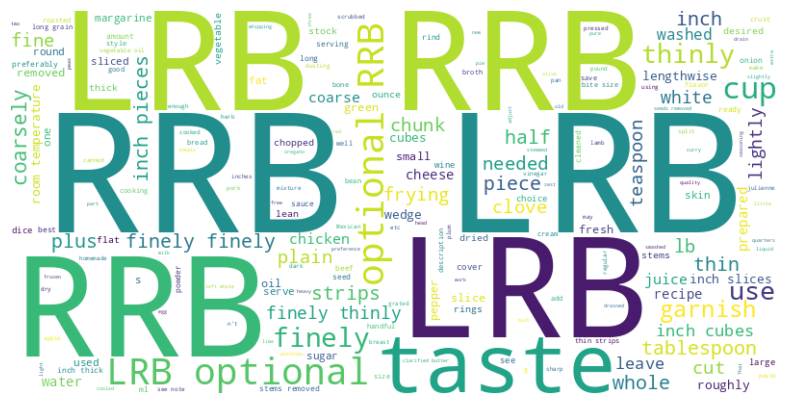

In [14]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# --- 2. Concatenate all tokens into a single string ---
# WordCloud needs a single large string of text as input.
text = " ".join(token for token in df.token.astype(str))

# --- 3. Define Stopwords (optional but recommended) ---
# Stopwords are common words to ignore (like 'a', 'the', 'is', 'of').
custom_stopwords = set(STOPWORDS)

# --- 4. Generate the Word Cloud ---
wordcloud = WordCloud(
    stopwords=custom_stopwords,
    background_color="white",
    width=800,
    height=400
).generate(text)

# --- 5. Display the Word Cloud ---
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Grouping and Combining Tokens

In [15]:
import pandas as pd

df = pd.read_csv("/kaggle/input/recipe-ingredient-dataset/train.csv")

# --- Step 1 — Define the combining function ---
def combine_tokens_and_labels(group):
    group = group.sort_values("token_id")
    return pd.Series({
        # Convert the 'token' column to string before calling .tolist()
        "tokens": group["token"].astype(str).tolist(),
        "labels": group["label"].tolist()
    })

# --- Step 2 — Apply grouping properly ---
grouped = (
    df.groupby(["source", "ingredient_id"], group_keys=False)
      .apply(combine_tokens_and_labels)
      .reset_index()
)

# --- Step 3 : make it human-readable ---
grouped["tokens_joined"] = grouped["tokens"].apply(lambda x: " ".join(x))
grouped["labels_joined"] = grouped["labels"].apply(lambda x: ", ".join(x))

# --- Step 4 : drop tokens and labels ---
grouped = grouped.drop(columns=["tokens", "labels", "source", "ingredient_id"])

print("✅ Grouping successful. Example of grouped tokens and labels:\n")
df = grouped
df

✅ Grouping successful. Example of grouped tokens and labels:



/tmp/ipykernel_38/1893500296.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(combine_tokens_and_labels)


,tokens_joined,labels_joined
0,4 cloves garlic,"QUANTITY, UNIT, NAME"
1,"2 tablespoons vegetable oil , divided","QUANTITY, UNIT, NAME, NAME, O, STATE"
2,2 tablespoons dried marjoram,"QUANTITY, UNIT, DF, NAME"
3,"1 large red onion , 1/4-inch slices pulled int...","QUANTITY, SIZE, NAME, NAME, O, O, O, O, O, O"
4,"2 jalapeno peppers , seeded and minced","QUANTITY, NAME, NAME, O, STATE, O, STATE"
...,...,...
6607,2 lbs valrhona dark bittter chocolate,"QUANTITY, UNIT, NAME, NAME, NAME, NAME"
6608,"3 cucumbers , if using English or Burpless cuc...","QUANTITY, NAME, O, O, O, O, O, O, O, O, O, O, ..."
6609,6 ounces Greek olives -LRB- in brine or oil -RRB-,"QUANTITY, UNIT, NAME, NAME, O, O, O, O, O, O"
6610,1 1/4 teaspoons baking soda,"QUANTITY, UNIT, NAME, NAME"


# 2. Preprocessing 

In [16]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data if not already available
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stop_words.discard('and')  # keep 'and'

# Define punctuation to remove (keep /, and \)
punct_to_remove = set(string.punctuation) - {',', '/', '\\'}
punct_to_remove.update(['-lrb-', '-rrb-'])  # handle these special tokens

def clean_and_align(tokens_str, labels_str):
    tokens = tokens_str.split()
    labels = labels_str.split(', ')
    
    cleaned_tokens = []
    cleaned_labels = []
    
    for tok, lab in zip(tokens, labels):
        tok_lower = tok.lower().strip()
        
        # Skip unwanted punctuation tokens entirely (but keep '/', '\')
        if tok_lower in punct_to_remove:
            continue
        
        # Split hyphenated tokens like "1/4-inch" → ["1/4", "inch"]
        if re.match(r'^[a-z0-9/]+-[a-z]+$', tok_lower):
            parts = tok_lower.split('-')
            for p in parts:
                tok_lemma = lemmatizer.lemmatize(p)
                cleaned_tokens.append(tok_lemma)
                cleaned_labels.append(lab)
            continue
        
        # Remove stopwords (except 'and')
        if tok_lower in stop_words and tok_lower != "and":
            continue
        
        # Lemmatize token but do NOT strip comma, slash, backslash
        tok_lemma = lemmatizer.lemmatize(tok_lower)
        
        cleaned_tokens.append(tok_lemma)
        cleaned_labels.append(lab)
    
    return " ".join(cleaned_tokens), ", ".join(cleaned_labels)

# Apply cleaning
df[['tokens_cleaned', 'labels_cleaned']] = df.apply(
    lambda row: pd.Series(clean_and_align(row['tokens_joined'], row['labels_joined'])), axis=1
)

# Tokenize back into lists
df['tokens'] = df['tokens_cleaned'].apply(lambda x: x.split())
df['labels'] = df['labels_cleaned'].apply(lambda x: x.split(', '))

# Drop intermediate columns
df = df[['tokens', 'labels']]

df.head(10)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tokens,labels
0,"[4, clove, garlic]","[QUANTITY, UNIT, NAME]"
1,"[2, tablespoon, vegetable, oil, ,, divided]","[QUANTITY, UNIT, NAME, NAME, O, STATE]"
2,"[2, tablespoon, dried, marjoram]","[QUANTITY, UNIT, DF, NAME]"
3,"[1, large, red, onion, ,, 1/4, inch, slice, pu...","[QUANTITY, SIZE, NAME, NAME, O, O, O, O, O, O]"
4,"[2, jalapeno, pepper, ,, seeded, and, minced]","[QUANTITY, NAME, NAME, O, STATE, O, STATE]"
5,"[1, tablespoon, olive, oil]","[QUANTITY, UNIT, NAME, NAME]"
6,"[extra, virgin, olive, oil, ,, drizzling]","[NAME, NAME, NAME, NAME, O, O]"
7,"[1/3, cup, sliced, pitted, ripe, olive, optional]","[QUANTITY, UNIT, STATE, STATE, STATE, NAME, O]"
8,"[3, clove, garlic, ,, minced]","[QUANTITY, UNIT, NAME, O, STATE]"
9,"[4, tablespoon, oyster, sauce]","[QUANTITY, UNIT, NAME, NAME]"


In [17]:
# --- 1. IOB conversion function ---
def convert_to_iob(labels):
    """
    Convert a list of labels (e.g., ['QUANTITY', 'UNIT', 'NAME', 'O', ...])
    into IOB format (e.g., ['B-QUANTITY', 'B-UNIT', 'B-NAME', 'O', ...])
    """
    iob_labels = []
    prev_label = "O"
    for label in labels:
        if label == "O":
            iob_labels.append("O")
            prev_label = "O"
        else:
            if label != prev_label:
                iob_labels.append("B-" + label)
            else:
                iob_labels.append("I-" + label)
            prev_label = label
    return iob_labels

# --- 2. Apply to cleaned dataset ---
df['iob_labels'] = df['labels'].apply(convert_to_iob)

# --- 3. Combine tokens with IOB for inspection ---
df['tokens_iob'] = df.apply(lambda row: list(zip(row['tokens'], row['iob_labels'])), axis=1)

# --- 4. Inspect the result ---
print(df[['tokens', 'labels', 'iob_labels', 'tokens_iob']].head(10))

                                              tokens  \
0                                 [4, clove, garlic]   
1        [2, tablespoon, vegetable, oil, ,, divided]   
2                   [2, tablespoon, dried, marjoram]   
3  [1, large, red, onion, ,, 1/4, inch, slice, pu...   
4      [2, jalapeno, pepper, ,, seeded, and, minced]   
5                        [1, tablespoon, olive, oil]   
6          [extra, virgin, olive, oil, ,, drizzling]   
7  [1/3, cup, sliced, pitted, ripe, olive, optional]   
8                      [3, clove, garlic, ,, minced]   
9                     [4, tablespoon, oyster, sauce]   

                                           labels  \
0                          [QUANTITY, UNIT, NAME]   
1          [QUANTITY, UNIT, NAME, NAME, O, STATE]   
2                      [QUANTITY, UNIT, DF, NAME]   
3  [QUANTITY, SIZE, NAME, NAME, O, O, O, O, O, O]   
4      [QUANTITY, NAME, NAME, O, STATE, O, STATE]   
5                    [QUANTITY, UNIT, NAME, NAME]   
6           

/tmp/ipykernel_38/796960057.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iob_labels'] = df['labels'].apply(convert_to_iob)
/tmp/ipykernel_38/796960057.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens_iob'] = df.apply(lambda row: list(zip(row['tokens'], row['iob_labels'])), axis=1)


In [18]:
def fix_iob_sequence(labels):
    """
    Ensures every I-XXX follows a valid B-XXX or I-XXX of the same type.
    If not, converts it to B-XXX.
    """
    fixed = []
    prev_label = 'O'
    changes = 0

    for lbl in labels:
        if lbl.startswith('I-'):
            curr_type = lbl.split('-')[1]
            prev_type = prev_label.split('-')[1] if '-' in prev_label else None

            # Invalid case: previous not of same entity or not B/I
            if not (prev_label.startswith(('B-', 'I-')) and prev_type == curr_type):
                lbl = f'B-{curr_type}'
                changes += 1
        fixed.append(lbl)
        prev_label = lbl

    return fixed, changes


# Apply to all rows and track changes
total_changes = 0
sample_before_after = []

for i, row in df.iterrows():
    fixed_labels, changes = fix_iob_sequence(row["iob_labels"])
    if changes > 0:
        total_changes += changes
        if len(sample_before_after) < 5:  # save a few examples
            sample_before_after.append((row["iob_labels"], fixed_labels))
    df.at[i, "iob_labels"] = fixed_labels

print(f"✅ Total invalid IOB tags corrected: {total_changes}")

if sample_before_after:
    print("\n🔍 Sample corrections:")
    for before, after in sample_before_after:
        print("Before:", before)
        print("After: ", after)
        print("-" * 60)
else:
    print("✅ No invalid IOB sequences detected!")

✅ Total invalid IOB tags corrected: 0
✅ No invalid IOB sequences detected!


# 3. Representation 

In [19]:
import pandas as pd
from gensim.models import Word2Vec

# Extract sentences as token lists from the cleaned tokens
sentences = df["tokens"].tolist()

# Ensure all elements are strings
sentences = [[str(token) for token in sent] for sent in sentences]

# Train Word2Vec on your tokens
w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=100,   # embedding dimension (adjustable)
    window=5,          # context window
    min_count=1,       # include all tokens
    workers=4,
    sg=1               # skip-gram model for better semantic capture
)

# Save model for reuse
w2v_model.save("/kaggle/working/word2vec_ingredients.model")

In [20]:
import numpy as np

def vectorize_tokens(tokens, model):
    vectors = []
    for token in tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

# Apply safely using .loc
df.loc[:, "word_vectors"] = df["tokens"].apply(lambda x: vectorize_tokens(x, w2v_model))
df.to_pickle("/kaggle/working/step3_word2vec_embeddings.pkl")
df.head()

/tmp/ipykernel_38/1901544563.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "word_vectors"] = df["tokens"].apply(lambda x: vectorize_tokens(x, w2v_model))


,tokens,labels,iob_labels,tokens_iob,word_vectors
0,"[4, clove, garlic]","[QUANTITY, UNIT, NAME]","[B-QUANTITY, B-UNIT, B-NAME]","[(4, B-QUANTITY), (clove, B-UNIT), (garlic, B-...","[[-0.111618884, 0.056000352, 0.055138994, -0.0..."
1,"[2, tablespoon, vegetable, oil, ,, divided]","[QUANTITY, UNIT, NAME, NAME, O, STATE]","[B-QUANTITY, B-UNIT, B-NAME, I-NAME, O, B-STATE]","[(2, B-QUANTITY), (tablespoon, B-UNIT), (veget...","[[-0.11735227, 0.07697449, 0.030172307, 0.0240..."
2,"[2, tablespoon, dried, marjoram]","[QUANTITY, UNIT, DF, NAME]","[B-QUANTITY, B-UNIT, B-DF, B-NAME]","[(2, B-QUANTITY), (tablespoon, B-UNIT), (dried...","[[-0.11735227, 0.07697449, 0.030172307, 0.0240..."
3,"[1, large, red, onion, ,, 1/4, inch, slice, pu...","[QUANTITY, SIZE, NAME, NAME, O, O, O, O, O, O]","[B-QUANTITY, B-SIZE, B-NAME, I-NAME, O, O, O, ...","[(1, B-QUANTITY), (large, B-SIZE), (red, B-NAM...","[[-0.09100731, 0.09674625, 0.051807307, 0.0381..."
4,"[2, jalapeno, pepper, ,, seeded, and, minced]","[QUANTITY, NAME, NAME, O, STATE, O, STATE]","[B-QUANTITY, B-NAME, I-NAME, O, B-STATE, O, B-...","[(2, B-QUANTITY), (jalapeno, B-NAME), (pepper,...","[[-0.11735227, 0.07697449, 0.030172307, 0.0240..."


# 4. Modelisation

In [21]:
!pip install tensorflow tensorflow-addons scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 14.9 MB/s eta 0:00:0000:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.4
    Uninstalling typeguard-4.4.4:
      Successfully uninstalled typeguard-4.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.17.0 requires typeguard<5,>=3, but you have typeguard 2.13.3 which is incompatible.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [22]:
import pandas as pd
import numpy as np

df = pd.read_pickle("/kaggle/working/step3_word2vec_embeddings.pkl")

X = df["word_vectors"].tolist()   # list of np.array (tokens × embedding_dim)
y = df["iob_labels"].tolist()     # list of labels per token

### Label Encoding for the IOB Tags

In [23]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import joblib

# Encode labels
all_labels = [lbl for seq in y for lbl in seq]
label_encoder = LabelEncoder()
label_encoder.fit(list(set(all_labels)))

num_classes = len(label_encoder.classes_)

# Convert labels to integer sequences
y_encoded = [label_encoder.transform(seq) for seq in y]

2026-02-28 01:43:17.725904: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772242997.915275      38 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772242997.971915      38 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Pad Sequences for Batch Training

In [24]:
import json
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = max(len(seq) for seq in X)  # longest sentence length
EMBED_DIM = len(X[0][0])

config = {
    "MAX_LEN": MAX_LEN,
    "EMBED_DIM": EMBED_DIM
}
# Save padding as a JSON file (reload them before padding/test preparation):
with open("/kaggle/working/preprocessing_config.json", "w") as f:
    json.dump(config, f)

# Pad word vectors
X_padded = pad_sequences(X, maxlen=MAX_LEN, dtype='float32', padding='post', truncating='post', value=0.0)

# Pad labels
y_padded = pad_sequences(y_encoded, maxlen=MAX_LEN, padding='post', value=label_encoder.transform(['O'])[0])

# One-hot encode labels for categorical crossentropy
y_padded = [to_categorical(seq, num_classes=num_classes) for seq in y_padded]
y_padded = np.array(y_padded)

### Build the BiLSTM + CRF Model

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input

# Input shape
input_layer = Input(shape=(MAX_LEN, EMBED_DIM))

# BiLSTM layers
bilstm = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(input_layer)
bilstm2 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(bilstm)
dropout = layers.Dropout(0.3)(bilstm2)

# Dense layer for NER tags
output = layers.TimeDistributed(layers.Dense(num_classes, activation="softmax"))(dropout)

# Model
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

I0000 00:00:1772243011.593246      38 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 22, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 22, 256)        │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 22, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 22, 15)         │         1,935 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,783 (1.53 MB)

 Trainable params: 400,783 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_padded, y_padded, test_size=0.1, random_state=42
)

In [27]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10,
    verbose=1
)

Epoch 1/10


I0000 00:00:1772243021.820625     131 cuda_dnn.cc:529] Loaded cuDNN version 90300


186/186 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8369 - loss: 0.7572 - val_accuracy: 0.9152 - val_loss: 0.2520
Epoch 2/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9187 - loss: 0.2507 - val_accuracy: 0.9306 - val_loss: 0.2130
Epoch 3/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9298 - loss: 0.2131 - val_accuracy: 0.9347 - val_loss: 0.1902
Epoch 4/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9349 - loss: 0.1933 - val_accuracy: 0.9408 - val_loss: 0.1716
Epoch 5/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9415 - loss: 0.1741 - val_accuracy: 0.9469 - val_loss: 0.1592
Epoch 6/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9463 - loss: 0.1626 - val_accuracy: 0.9496 - val_loss: 0.1501
Epoch 7/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9496 - loss: 0.1531 - val_accuracy: 0.9530 - val_loss: 0.1417
Epoch 8/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9542 - loss: 0.1390 - val_accuracy: 0.95

In [28]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9573 - loss: 0.1246
Validation Loss: 0.1210
Validation Accuracy: 0.9598


In [29]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=9867127408b13d3cb5ea31199510a5d17dce655a2bd66118c44d94166069099f
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [30]:
from seqeval.metrics import classification_report

# Predict
y_pred = model.predict(X_val)

# Convert one-hot → label names
y_true_tags = [
    [label_encoder.inverse_transform([np.argmax(tok)])[0] for tok in seq]
    for seq in y_val
]
y_pred_tags = [
    [label_encoder.inverse_transform([np.argmax(tok)])[0] for tok in seq]
    for seq in y_pred
]

print(classification_report(y_true_tags, y_pred_tags))

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
              precision    recall  f1-score   support

          DF       0.74      0.53      0.62        66
        NAME       0.62      0.70      0.65       680
    QUANTITY       0.95      0.98      0.96       630
        SIZE       0.91      0.81      0.86        37
       STATE       0.70      0.74      0.72       304
        TEMP       0.00      0.00      0.00        11
        UNIT       0.89      0.94      0.92       510

   micro avg       0.79      0.83      0.81      2238
   macro avg       0.69      0.67      0.68      2238
weighted avg       0.79      0.83      0.81      2238



/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
model.save("/kaggle/working/ner_bilstm_model.h5")

import joblib
joblib.dump(label_encoder, "/kaggle/working/label_encoder.pkl")

print("✅ Model and encoder saved successfully!")

✅ Model and encoder saved successfully!


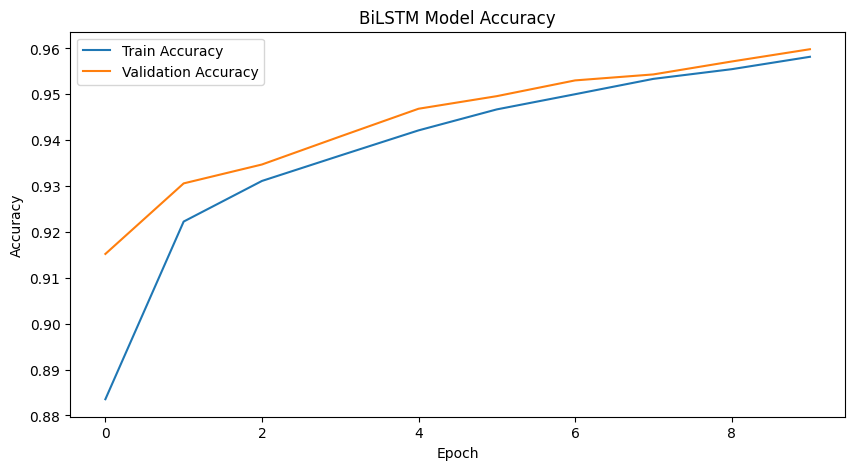

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('BiLSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
import tensorflow as tf
import joblib

model = tf.keras.models.load_model("/kaggle/working/ner_bilstm_model.h5")
label_encoder = joblib.load("/kaggle/working/label_encoder.pkl")

In [34]:
y_pred = model.predict(X_val)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


### Convert predictions and ground truths from one-hot → tag labels

In [35]:
import numpy as np

y_true_tags = [
    [label_encoder.inverse_transform([np.argmax(tok)])[0] for tok in seq]
    for seq in y_val
]
y_pred_tags = [
    [label_encoder.inverse_transform([np.argmax(tok)])[0] for tok in seq]
    for seq in y_pred
]

In [36]:
from seqeval.metrics import classification_report, precision_score, recall_score, f1_score

print("🔹 Classification Report:")
print(classification_report(y_true_tags, y_pred_tags))

print("🔹 Overall Precision:", precision_score(y_true_tags, y_pred_tags))
print("🔹 Overall Recall:", recall_score(y_true_tags, y_pred_tags))
print("🔹 Overall F1-Score:", f1_score(y_true_tags, y_pred_tags))

🔹 Classification Report:
              precision    recall  f1-score   support

          DF       0.74      0.53      0.62        66
        NAME       0.62      0.70      0.65       680
    QUANTITY       0.95      0.98      0.96       630
        SIZE       0.91      0.81      0.86        37
       STATE       0.70      0.74      0.72       304
        TEMP       0.00      0.00      0.00        11
        UNIT       0.89      0.94      0.92       510

   micro avg       0.79      0.83      0.81      2238
   macro avg       0.69      0.67      0.68      2238
weighted avg       0.79      0.83      0.81      2238

🔹 Overall Precision: 0.7883799830364716
🔹 Overall Recall: 0.8306523681858803
🔹 Overall F1-Score: 0.808964316797215


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
error_samples = []

for i, (true_seq, pred_seq) in enumerate(zip(y_true_tags, y_pred_tags)):
    if true_seq != pred_seq:
        error_samples.append({
            "index": i,
            "true": true_seq,
            "pred": pred_seq
        })

print(f"⚠️ {len(error_samples)} sequences contain boundary or tag errors.")

⚠️ 307 sequences contain boundary or tag errors.


In [38]:
for e in error_samples[:5]:
    print(f"\nSentence index: {e['index']}")
    print("True :", e["true"])
    print("Pred :", e["pred"])


Sentence index: 1
True : ['B-QUANTITY', 'B-UNIT', 'B-NAME', 'I-NAME', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Pred : ['B-QUANTITY', 'B-UNIT', 'B-NAME', 'B-NAME', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

Sentence index: 2
True : ['B-QUANTITY', 'B-UNIT', 'B-NAME', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Pred : ['B-QUANTITY', 'B-UNIT', 'B-NAME', 'I-NAME', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

Sentence index: 6
True : ['B-QUANTITY', 'B-SIZE', 'O', 'O', 'O', 'B-STATE', 'O', 'O', 'O', 'O', 'B-STATE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Pred : ['B-QUANTITY', 'B-SIZE', 'B-NAME', 'I-NAME', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

Sentence index: 7
True : ['B-QUANTITY', 'B-UNIT', 'B-STATE', 'B-NAME', 'O', 'O', 'O', 'O', 'O

In [39]:
import pandas as pd

def visualize_entity_errors(i):
    true_seq = y_true_tags[i]
    pred_seq = y_pred_tags[i]
    df_errors = pd.DataFrame({
        "Token_Index": range(len(true_seq)),
        "True_Label": true_seq,
        "Pred_Label": pred_seq
    })
    display(df_errors[df_errors["True_Label"] != df_errors["Pred_Label"]])

# Example
visualize_entity_errors(error_samples[0]['index'])

,Token_Index,True_Label,Pred_Label
3,3,I-NAME,B-NAME


# Preprocessing test.csv

In [40]:
import pandas as pd
import numpy as np
import re
import string
import json
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [41]:
# Load test.csv
test_df = pd.read_csv("/kaggle/input/recipe-ingredient-dataset/test.csv")

print("✅ Raw test data loaded:", test_df.shape)
test_df.head()

✅ Raw test data loaded: (12674, 5)


,source,ingredient_id,token_id,token,label
0,ar,0,0,1/2,QUANTITY
1,ar,0,1,large,SIZE
2,ar,0,2,sweet,NAME
3,ar,0,3,red,NAME
4,ar,0,4,onion,NAME


In [42]:
def combine_tokens_and_labels(group):
    group = group.sort_values("token_id")
    return pd.Series({
        "tokens": group["token"].astype(str).tolist(),
        "labels": group["label"].tolist()
    })

grouped_test = (
    test_df.groupby(["source", "ingredient_id"], group_keys=False)
           .apply(combine_tokens_and_labels)
           .reset_index()
)

grouped_test["tokens_joined"] = grouped_test["tokens"].apply(lambda x: " ".join(x))
grouped_test["labels_joined"] = grouped_test["labels"].apply(lambda x: ", ".join(x))

grouped_test = grouped_test.drop(columns=["tokens", "labels", "source", "ingredient_id"])
df_test = grouped_test.copy()

print("✅ Grouping successful:", df_test.shape)


✅ Grouping successful: (2188, 2)


/tmp/ipykernel_38/2178700507.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(combine_tokens_and_labels)


In [43]:
# Load NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stop_words.discard('and')

# Define punctuation to remove
punct_to_remove = set(string.punctuation) - {',', '/', '\\'}
punct_to_remove.update(['-lrb-', '-rrb-'])

def clean_and_align(tokens_str, labels_str):
    tokens = tokens_str.split()
    labels = labels_str.split(', ')
    cleaned_tokens, cleaned_labels = [], []

    for tok, lab in zip(tokens, labels):
        tok_lower = tok.lower().strip()
        if tok_lower in punct_to_remove:
            continue
        if re.match(r'^[a-z0-9/]+-[a-z]+$', tok_lower):
            parts = tok_lower.split('-')
            for p in parts:
                cleaned_tokens.append(lemmatizer.lemmatize(p))
                cleaned_labels.append(lab)
            continue
        if tok_lower in stop_words and tok_lower != "and":
            continue
        cleaned_tokens.append(lemmatizer.lemmatize(tok_lower))
        cleaned_labels.append(lab)
    return " ".join(cleaned_tokens), ", ".join(cleaned_labels)

# Apply cleaning
df_test[['tokens_cleaned', 'labels_cleaned']] = df_test.apply(
    lambda row: pd.Series(clean_and_align(row['tokens_joined'], row['labels_joined'])), axis=1
)

# Tokenize back into lists
df_test['tokens'] = df_test['tokens_cleaned'].apply(lambda x: x.split())
df_test['labels'] = df_test['labels_cleaned'].apply(lambda x: x.split(', '))

# Drop intermediate columns
df_test = df_test[['tokens', 'labels']]

print("✅ Cleaning done.")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Cleaning done.


In [44]:
def convert_to_iob(labels):
    iob_labels = []
    prev_label = "O"
    for label in labels:
        if label == "O":
            iob_labels.append("O")
            prev_label = "O"
        else:
            if label != prev_label:
                iob_labels.append("B-" + label)
            else:
                iob_labels.append("I-" + label)
            prev_label = label
    return iob_labels

df_test['iob_labels'] = df_test['labels'].apply(convert_to_iob)

In [45]:
# Load saved Word2Vec model
w2v_model = Word2Vec.load("/kaggle/working/word2vec_ingredients.model")

def vectorize_tokens(tokens, model):
    vectors = []
    for token in tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

df_test["word_vectors"] = df_test["tokens"].apply(lambda x: vectorize_tokens(x, w2v_model))

In [46]:
# Load preprocessing config and encoder
with open("/kaggle/working/preprocessing_config.json", "r") as f:
    config = json.load(f)

label_encoder = joblib.load("/kaggle/working/label_encoder.pkl")
MAX_LEN = config["MAX_LEN"]
EMBED_DIM = config["EMBED_DIM"]

# Encode labels
y_test = [label_encoder.transform(seq) for seq in df_test["iob_labels"]]
X_test = df_test["word_vectors"].tolist()

# Pad sequences
X_test_padded = pad_sequences(X_test, maxlen=MAX_LEN, dtype='float32', padding='post', truncating='post', value=0.0)
y_test_padded = pad_sequences(y_test, maxlen=MAX_LEN, padding='post', value=label_encoder.transform(['O'])[0])

# One-hot encode labels
num_classes = len(label_encoder.classes_)
y_test_padded = [to_categorical(seq, num_classes=num_classes) for seq in y_test_padded]
y_test_padded = np.array(y_test_padded)

print("✅ Test preprocessing complete.")
print("X_test_padded:", X_test_padded.shape)
print("y_test_padded:", y_test_padded.shape)

✅ Test preprocessing complete.
X_test_padded: (2188, 22, 100)
y_test_padded: (2188, 22, 15)


In [47]:
model.evaluate(X_test_padded, y_test_padded)

69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9607 - loss: 0.1164


[0.13470229506492615, 0.954399824142456]

### Check per-class metrics

In [48]:
from sklearn.metrics import classification_report
import numpy as np

# 1️⃣ Get model predictions (probabilities → class indices)
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=-1)

# 2️⃣ Convert one-hot encoded test labels back to class indices
y_true = np.argmax(y_test_padded, axis=-1)

# 3️⃣ Flatten sequences (ignore padding positions)
y_true_flat = []
y_pred_flat = []

for i in range(len(y_true)):
    for j in range(len(y_true[i])):
        # Ignore padding tokens (they are 'O' or the last index padded)
        if y_true[i][j] != label_encoder.transform(['O'])[0]:
            y_true_flat.append(y_true[i][j])
            y_pred_flat.append(y_pred[i][j])

# 4️⃣ Decode integer labels back to string labels
y_true_labels = label_encoder.inverse_transform(y_true_flat)
y_pred_labels = label_encoder.inverse_transform(y_pred_flat)

# 5️⃣ Compute per-class metrics
report = classification_report(y_true_labels, y_pred_labels, digits=4)
print("🔹 Classification Report on Test Set:\n")
print(report)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
🔹 Classification Report on Test Set:

              precision    recall  f1-score   support

        B-DF     0.8305    0.5000    0.6242       196
      B-NAME     0.7444    0.7790    0.7613      2258
  B-QUANTITY     0.9727    0.9895    0.9810      2089
      B-SIZE     0.8077    0.8155    0.8116       103
     B-STATE     0.7903    0.7063    0.7459      1035
      B-TEMP     0.0000    0.0000    0.0000        42
      B-UNIT     0.9238    0.9298    0.9268      1696
      I-NAME     0.7862    0.6971    0.7389      1403
  I-QUANTITY     0.6585    0.8571    0.7448        63
      I-SIZE     0.0000    0.0000    0.0000         1
     I-STATE     0.0000    0.0000    0.0000        85
      I-TEMP     0.0000    0.0000    0.0000         1
      I-UNIT     1.0000    0.1176    0.2105        34
           O     0.0000    0.0000    0.0000         0

    accuracy                         0.8163      9006
   macro avg     0.5367    0.4566    0.4675      9006
wei

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

In [49]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_ingredient_labels(sentences, model):
    """
    Predict IOB labels for a list of ingredient sentences using trained model.
    Returns list of token-label pairs per sentence, filtering out 'O' labels.
    """

    # Step 1: Create DataFrame like test.csv, one row per sentence
    df = pd.DataFrame({
        "source": ["user"]*len(sentences),
        "ingredient_id": list(range(len(sentences))),
        "tokens_joined": [" ".join(sent.split()) for sent in sentences],  # space-separated tokens
        "labels_joined": [", ".join(['O']*len(sent.split())) for sent in sentences]  # dummy 'O' labels
    })    
    
    # Apply normalize_punctuation_spacing
    # df['tokens_joined'] = df['tokens_joined'].apply(normalize_punctuation_spacing)

    # Step 2: Clean and align tokens
    df[['tokens_cleaned', 'labels_cleaned']] = df.apply(
        lambda row: pd.Series(clean_and_align(row['tokens_joined'], row['labels_joined'])),
        axis=1
    )

    # Step 3: Tokenize
    df['tokens'] = df['tokens_cleaned'].apply(lambda x: x.split())
    df['labels'] = df['labels_cleaned'].apply(lambda x: x.split(', '))

    # Step 4: Convert to IOB and fix
    df['iob_labels'] = df['labels'].apply(convert_to_iob)
    df['iob_labels'] = df['iob_labels'].apply(fix_iob_sequence)

    # Step 5: Vectorize tokens
    df['word_vectors'] = df['tokens'].apply(lambda x: vectorize_tokens(x, w2v_model))

    # Step 6: Pad sequences
    X_padded = pad_sequences(
        df['word_vectors'].tolist(),
        maxlen=MAX_LEN,
        dtype='float32',
        padding='post',
        truncating='post',
        value=0.0
    )

    # Step 7: Predict
    y_pred_probs = model.predict(X_padded)
    y_pred = np.argmax(y_pred_probs, axis=-1)

    # Step 8: Decode predictions and filter out 'O'
    predictions = []
    for i, tokens in enumerate(df['tokens']):
        pred_seq = []
        for j, token in enumerate(tokens):
            label = label_encoder.inverse_transform([y_pred[i][j]])[0]
            if label != 'O':  # Only keep meaningful labels
                pred_seq.append((token, label))
        predictions.append(pred_seq)

    return predictions

# --- Example usage ---
sentences = [
    "2 cloves garlic",
    "1 large red onion , chopped",
    "2 lbs valrhona dark bittter chocolate",
]

predictions = predict_ingredient_labels(sentences, model)

for sent, pred in zip(sentences, predictions):
    print(f"\nSentence: {sent}")
    print("Predictions (meaningful only):", pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Sentence: 2 cloves garlic
Predictions (meaningful only): [('2', 'B-QUANTITY'), ('clove', 'B-UNIT'), ('garlic', 'B-NAME')]

Sentence: 1 large red onion , chopped
Predictions (meaningful only): [('1', 'B-QUANTITY'), ('large', 'B-SIZE'), ('red', 'B-NAME'), ('onion', 'I-NAME'), ('chopped', 'B-STATE')]

Sentence: 2 lbs valrhona dark bittter chocolate
Predictions (meaningful only): [('2', 'B-QUANTITY'), ('lb', 'B-UNIT'), ('valrhona', 'B-NAME'), ('dark', 'I-NAME'), ('chocolate', 'I-NAME')]
